# Programming for Economics


## Problem Set 03 - Week 4 - Group 02

*07/02/2023*

Setting directory

In [1]:
import os
os.chdir(r'C:\Users\icon8\Desktop\Programming for Economics\W4')

Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions_albert import gini
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import math
import quantecon as qe
import seaborn as sns

Setting random number seed

In [3]:
np.random.seed(23)

### Exercise 1. Monte Carlo simulation: OLS asymptotic behavior. (20 points)


a. Now, following the steps in lecture 4, slide 12, run a Monte Carlo simulation to show the
asymptotic properties of βˆOLS and replicate figure 1 and figure 2 from slide 13. Set the
number of simulations equal to T=10000. For each repetition of the experiment (step 3) use
a sample size of N = 100

In [4]:
# Set parameters and creating empty storage lists
sigma_e = 5     #Std. Dev. of error term
N = 100           #Sample size       
T = 10000       #Number of simulation iterations
b0_bin_a = np.empty(T)   
b1_bin_a = np.empty(T)

# For loop: simulate stationary distribution (N=100)
for i in range(1,T):
            e = np.random.normal(0,sigma_e,N) 
            x2 = np.random.normal(0,1,N)
            y1 = 2 + 0.5*x2 + e
            X = sm.add_constant(x2)    # We need to add constant, B0
            ols1 = sm.OLS(y1,X).fit()
            b0_bin_a[i] = ols1.params[0]
            b1_bin_a[i] = ols1.params[1]

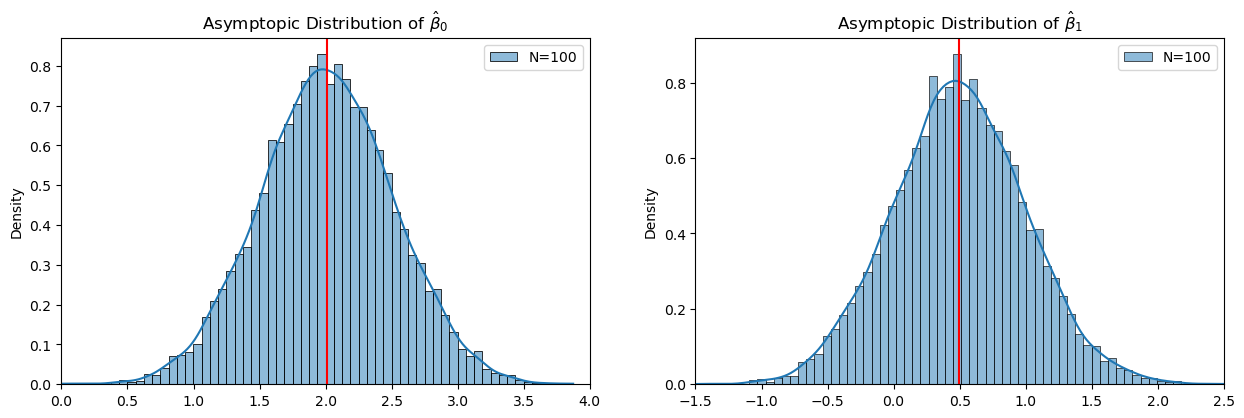

In [5]:
# Plot the distribution of OLS estimators (B0,B1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

sns.histplot(b0_bin_a, ax=ax[0], label="N=100", kde=True, stat="density")
ax[0].axvline(x=b0_bin_a.mean(), color='red')
ax[0].set_xlim(0,4)
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title(r"Asymptopic Distribution of $\hat{\beta}_{0}$")

sns.histplot(b1_bin_a, ax=ax[1], label="N=100", kde=True, stat="density")
ax[1].axvline(x=b1_bin_a.mean(), color='red')
ax[1].set_xlim(-1.5,2.5)
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title(r"Asymptopic Distribution of $\hat{\beta}_{1}$")

plt.show()


b. Redo exercise a) with a sample size N = 1000. How do the βˆOLS asymptotic distributions
change when the sample size increases? Hint: For a visual demonstration, keep the same
x-axis in the plots in a) and b) using plt.xlim()

In [6]:
# Set Parameters
sigma_e = 5
N = 1000
T = 10000
b0_bin_b = np.empty(T)
b1_bin_b = np.empty(T)

# For loop: simulate stationary distribution (N=1000)
for i in range(1,T):
            e = np.random.normal(0,sigma_e,N) 
            x2 = np.random.normal(0,1,N)
            y1 = 2 + 0.5*x2 + e
            X = sm.add_constant(x2)     # We need to add constant, B0
            ols1 = sm.OLS(y1,X).fit()
            b0_bin_b[i] = ols1.params[0]
            b1_bin_b[i] = ols1.params[1]

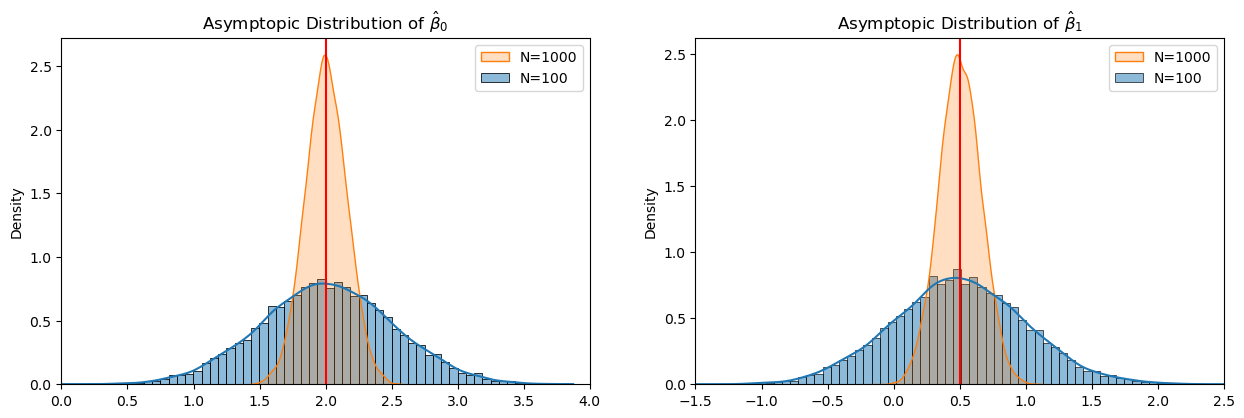

In [7]:
# Plot stationary distribution of OLS coefficients (B0, B1) for N=100 and N=1000
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

sns.histplot(b0_bin_a, ax=ax[0], label="N=100", kde=True, stat="density")
sns.kdeplot(b0_bin_b, ax=ax[0], label="N=1000", fill=True)
ax[0].axvline(x=b0_bin_b.mean(), color='red')
ax[0].set_xlim(0,4)
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title(r"Asymptopic Distribution of $\hat{\beta}_{0}$")

sns.histplot(b1_bin_a, ax=ax[1], label="N=100", kde=True, stat="density")
sns.kdeplot(b1_bin_b, ax=ax[1], label="N=1000", fill=True)
ax[1].axvline(x=b1_bin_b.mean(), color='red')
ax[1].set_xlim(-1.5,2.5)
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title(r"Asymptopic Distribution of $\hat{\beta}_{1}$")

plt.show()

As the sample size increases, the asymptotic distribution (N &rarr; &infin;) of the OLS estimators become more closely centered about their respective means (B0: 2; B1: 0.5). This is a consequence of CLT and LLN; each sampled OLS estimator has 10x more observations in part b) to estimate the true population coeff, thus reducing sampling error when averaging across sampled estimators. 

### Exercise 2. Solving the earnings distribution in an Aiyagari economy (40 points)

a. Simulate and plot the AR(1) process given by equation (1) for T=50 periods

In [8]:
# Define AR(1) function
def ar1_sim(T,rho,y0=0,a=0,sigma_e=0.25):
    y = np.empty(T)
    y[0] = y0
    for i in range(1,T):
        e = np.random.normal(0,sigma_e,1) 
        y[i] = rho*y[i-1] + e
    return y

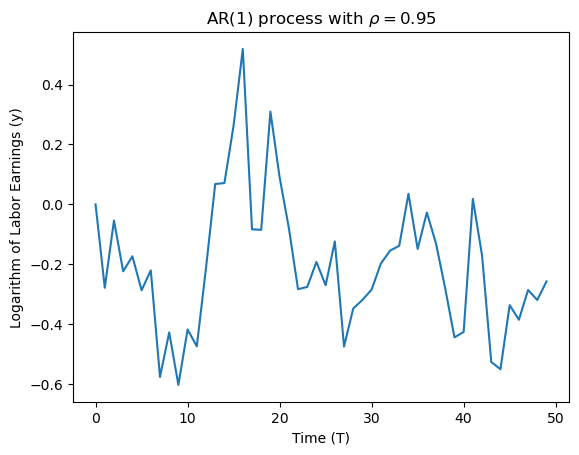

In [9]:
# Set parameters 
T = 50
rho = 0.95

# Simulate AR(1) for 50 periods
y_a = ar1_sim(50, 0.95)

# Plot AR(1)
fig, ax = plt.subplots()
ax.plot(range(0,T), y_a)
ax.set_xlabel('Time (T)')
ax.set_ylabel('Logarithm of Labor Earnings (y)')
ax.set_title(fr'AR(1) process with $\rho={rho}$')
plt.show()

b. Create a function that simulates N AR(1) processes for T periods.
* The function should have the following inputs (N, T,rho, y0,sigmae)
* The output of the function should be a 2-D array with size (N,T)


In [10]:
#Define function that simulates N AR(1) processes for T periods, outputting a 2-D array with size (N,T)

def ar1_rep(N,T,rho,y0=0,a=0,sigma_e=0.25):
    data = []
    for j in range(0,N):
        y = np.empty(T)
        y[0] = y0
        for i in range(1,T):
            e = np.random.normal(0,sigma_e,1) 
            y[i] = rho*y[i-1] + e
        data.append(y)
    return np.array(data)

c. Simulate and plot 5 AR(1) processes given by equation (1) for t=50 periods.

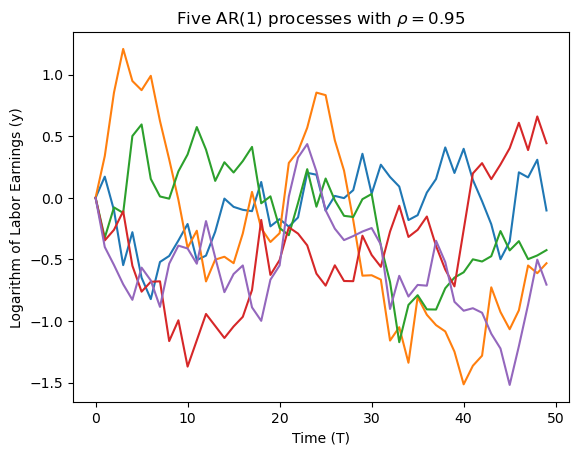

In [11]:
# Set parameters
N = 5
T = 50
rho = 0.95

# Simulate 5 AR(1)s for 50 periods
n_5 = ar1_rep(N, T, rho)

# Plot 5 AR(1)s for 50 periods
fig, ax = plt.subplots() 
ax.plot(n_5.transpose())    #Need to transpose, otherwise matplotlib will use columns as separate line entities
ax.set_xlabel('Time (T)')
ax.set_ylabel('Logarithm of Labor Earnings (y)')
ax.set_title(r'Five AR(1) processes with $\rho=0.95$')
plt.show()

d. The stationary earnings distribution. Simulate for a large T (like T=1000) the AR(1) process
of 10000 individuals. Use the result of the last period to plot the stationary distribution.
From the stationary distribution, compute the variance of the log of earnings (yt), and the
Gini coefficient of earnings (e^yt ).

In [12]:
# Set parameters
N = 10000
T = 1000
rho = 0.95

# Simulate 10,000 AR(1)s for 1000 periods
n_10000 = ar1_rep(N, T, rho)

# Select the last time period (column)
stationary_earnings = n_10000[:,T-1]

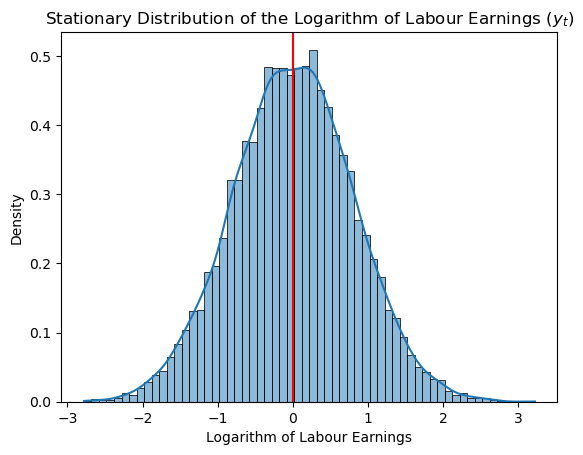

The variance of log earnings is:  0.6351
The gini_coefficient of earnings is:  0.4273


In [13]:
# Plot Stationary earnings distribution
fig, ax = plt.subplots() 
sns.histplot(stationary_earnings, label="Long-run earnings", kde=True, stat="density")
ax.axvline(x=stationary_earnings.mean(), color='red')
ax.set_xlabel('Logarithm of Labour Earnings')
ax.set_ylabel('Density')
ax.set_title(r'Stationary Distribution of the Logarithm of Labour Earnings ($y_{t}$)')
plt.show()

# Calculate the variance of log earnings, Gini
var_log_earnings = np.var(stationary_earnings)
print('The variance of log earnings is: ',round(var_log_earnings,4))
e_earnings = np.exp(stationary_earnings)
gini_earnings = gini(e_earnings)
print('The gini_coefficient of earnings is: ',round(gini_earnings,4))

e. For computational reasons, Aiyagari discretizes the AR(1) process into a Markov process of
7 states. Using the Rouwenhorst method, discretize the AR(1) process of this exercise into
a 3 states Markov process. What is the resulting transition matrix P? What is the resulting
stationary distribution ψ
∗
?


In [14]:
# Import rouwenhorst
from quantecon import rouwenhorst

# Set parameters
n = 3           #No. of points to approximate the distribution
ybar = 0        #Mean of the AR(1) process
sigma_e = 0.25  #Std. Dev. of the error process
rho = 0.95      #Persistence parameter in AR(1)

# Discretize AR(1)
markov_chain = rouwenhorst(n, ybar, sigma_e, rho)
trans_mat_raw = markov_chain.P
trans_mat_round = np.around(trans_mat_raw, decimals = 3)
stat_dist = markov_chain.stationary_distributions  

print('The Markov Chain is: \n', trans_mat_round)
print('The stationary distribution is: \n',stat_dist)

The Markov Chain is: 
 [[0.951 0.049 0.001]
 [0.024 0.951 0.024]
 [0.001 0.049 0.951]]
The stationary distribution is: 
 [[0.25 0.5  0.25]]


### Exercise 3. Simulating distributions and computing expectations (20 points).

a. Simulate a binomial distribution with n = 4 and p = 0.5. Plot the resulting distribution

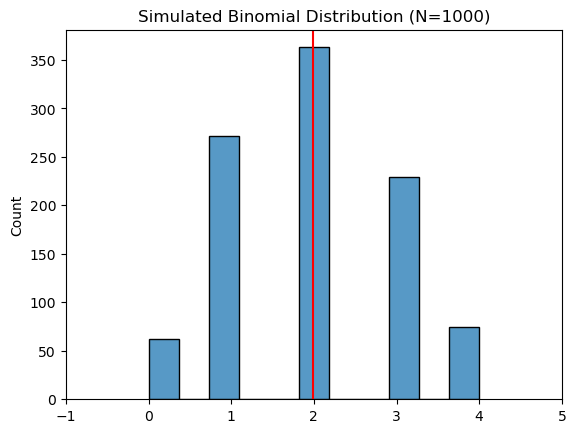

In [15]:
# Set Parameters
n = 4     #Number of Bernoulli trials
p = 0.5   #Probability of success in a trial
N = 1000  #Sample size

# Random sample of the Binomial distribution (N=1000)
binomial_sample = np.random.binomial(n, p, N)

# Plot random sample
fig, ax = plt.subplots()
sns.histplot(binomial_sample, label="Binomial distribution", stat="count")   #Count because binomial is discrete
ax.axvline(x=binomial_sample.mean(), color='red')
ax.set_title('Simulated Binomial Distribution (N=1000)')
ax.set_ylabel('Count')
ax.set_xlim(-1,5)
plt.show()

b. Compute the expected value of a function g(x) = x
2 where x follows a Poisson distribution
with λ = 2. Use Monte Carlo integration.
Is your result equal to g(E(x))? where E(x) = λ = 2 if x ∼ Poisson(λ). Why not?


In [16]:
# Set Parameters
lam = 2   #Expected rate of occurences
N = 1000  #Sample size

# Random sample of the Poisson distribution (N=1000)
pois = np.random.poisson(lam, N)

In [17]:
# Define function: g(x) = x^2
def g(x): 
    return x**2

# Monte Carlo Integration
G_x = g(pois)
mc_integral_pois = round(np.mean(G_x),6)
print('E[g(x)] =', mc_integral_pois)

# Check if the same as g(E[X])
print('g(E[x]) =', g(lam))
print()
print("Is g(E[x]) == E[g(x)]?", g(lam) == mc_integral_pois)

E[g(x)] = 5.995
g(E[x]) = 4

Is g(E[x]) == E[g(x)]? False


This is because g(x) is not a linear function, and thus the linearity of expectations does not apply. 
Intuitively, the space between larger samples is being "stretched" proportionally more than between smaller samples, so the interpolated expectation is overstated. 

### Exercise 4. Simulating and computing expectations in an economy

a. Simulate y for N = 100000 and compute the average, the variance, and the Gini of y


In [18]:
# Set parameters
mu = 7.5     #Mean of Lognormal
sigma = 0.8  #Std. Dev. of Lognormal
N = 10000     #Sample size

# Random sample of lognormal distribution
y = np.random.lognormal(mu, sigma, N)

# Calculate the averages, variance and gini coefficient of the log-normal distribution
y_avg = round(np.mean(y),0)
y_var = round(np.var(y),0)
y_gini = round(gini(y),4)

print('Average of log-normal distribution:', y_avg)
print('Variance of log-normal distribution:', y_var)
print('Gini coefficient of log-normal distribution:', y_gini)

Average of log-normal distribution: 2515.0
Variance of log-normal distribution: 6116242.0
Gini coefficient of log-normal distribution: 0.433


b. Now consider that individuals follow a consumption rule that takes the following functional
form:
* ci = (yi)0.8 + 0.5yi + 500.

Compute the average, the variance, and the Gini coefficient of c.

In [19]:
# Define consumption function
def consumption(y):
    return y**0.8 + 0.5*y + 500

# Generate connsumption values
c = consumption(y)

# Calculate the averages, variance and gini coefficient of consumption
c_avg = round(np.mean(c),3)
c_var = round(np.var(c),3)
c_gini = round(gini(c),3)

print('Average of consumption:', c_avg)
print('Variance of consumption:', c_var)
print('Gini coefficient of consumption:', c_gini)

Average of consumption: 2256.089
Variance of consumption: 2550956.527
Gini coefficient of consumption: 0.319


c. Plot the distribution of y and c in the same graph.

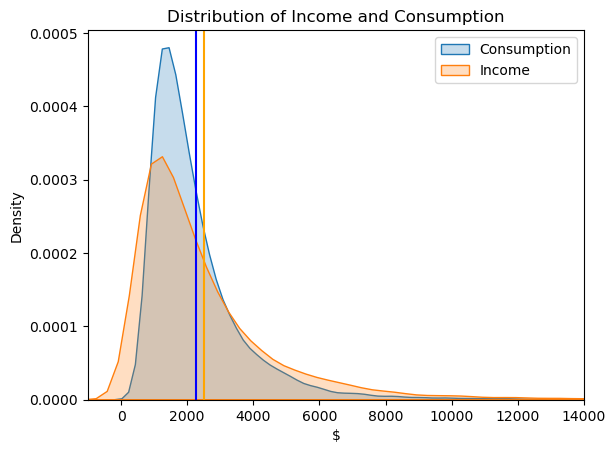

In [20]:
#Distribution of income and consumption in one graph:
fig, ax = plt.subplots()

sns.kdeplot(c, label="Consumption", fill=True)
sns.kdeplot(y, label="Income", fill=True)
ax.axvline(x=c.mean(), color='blue')         #Colored vertical lines to denote respective means
ax.axvline(x=y.mean(), color='orange')
ax.set_xlim(-1000,14000)
ax.set_xlabel("$")
ax.set_ylabel("Density")
ax.set_title("Distribution of Income and Consumption")
ax.legend()

plt.show()